# EDA 

## Imports

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
from fastai.basics import *
from fastai.tabular import *

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
plt.style.use(['dark_background'])

## Paths

In [ ]:
PATH = Config.data_path()/'competitions/elo-merchant-category-recommendation/'
list(PATH.glob("*.csv"))

## Read data

In [ ]:
train = pd.read_csv(PATH/"train.csv", parse_dates=["first_active_month"])
test  = pd.read_csv(PATH/"test.csv", parse_dates=["first_active_month"])

In [ ]:
_old = pd.read_csv(PATH/"historical_transactions.csv", parse_dates=['purchase_date'])

In [ ]:
_new = pd.read_csv(PATH/"new_merchant_transactions.csv", parse_dates=['purchase_date'])

In [ ]:
_merchant = pd.read_csv(PATH/"merchants.csv")

In [ ]:
train.head().T

,0,1,2,3,4
first_active_month,2017-06-01 00:00:00,2017-01-01 00:00:00,2016-08-01 00:00:00,2017-09-01 00:00:00,2017-11-01 00:00:00
card_id,C_ID_92a2005557,C_ID_3d0044924f,C_ID_d639edf6cd,C_ID_186d6a6901,C_ID_cdbd2c0db2
feature_1,5,4,2,4,1
feature_2,2,1,2,3,3
feature_3,1,0,0,0,0
target,-0.820283,0.392913,0.688056,0.142495,-0.159749


In [ ]:
test.head().T

,0,1,2,3,4
first_active_month,2017-04-01 00:00:00,2017-01-01 00:00:00,2017-08-01 00:00:00,2017-12-01 00:00:00,2015-12-01 00:00:00
card_id,C_ID_0ab67a22ab,C_ID_130fd0cbdd,C_ID_b709037bc5,C_ID_d27d835a9f,C_ID_2b5e3df5c2
feature_1,3,2,5,2,5
feature_2,3,3,1,1,1
feature_3,1,0,1,0,1


In [ ]:
_old.head().T

,0,1,2,3,4
authorized_flag,Y,Y,Y,Y,Y
card_id,C_ID_4e6213e9bc,C_ID_4e6213e9bc,C_ID_4e6213e9bc,C_ID_4e6213e9bc,C_ID_4e6213e9bc
city_id,88,88,88,88,88
category_1,N,N,N,N,N
installments,0,0,0,0,0
category_3,A,A,A,A,A
merchant_category_id,80,367,80,560,80
merchant_id,M_ID_e020e9b302,M_ID_86ec983688,M_ID_979ed661fc,M_ID_e6d5ae8ea6,M_ID_e020e9b302
month_lag,-8,-7,-6,-5,-11
purchase_amount,-0.703331,-0.733128,-0.720386,-0.735352,-0.722865


In [ ]:
_new.head().T

,0,1,2,3,4
authorized_flag,Y,Y,Y,Y,Y
card_id,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_ef55cf8d4b
city_id,107,140,330,-1,-1
category_1,N,N,N,Y,Y
installments,1,1,1,1,1
category_3,B,B,B,B,B
merchant_category_id,307,307,507,661,166
merchant_id,M_ID_b0c793002c,M_ID_88920c89e8,M_ID_ad5237ef6b,M_ID_9e84cda3b1,M_ID_3c86fa3831
month_lag,1,1,2,1,1
purchase_amount,-0.557574,-0.56958,-0.551037,-0.671925,-0.659904


## Visualize

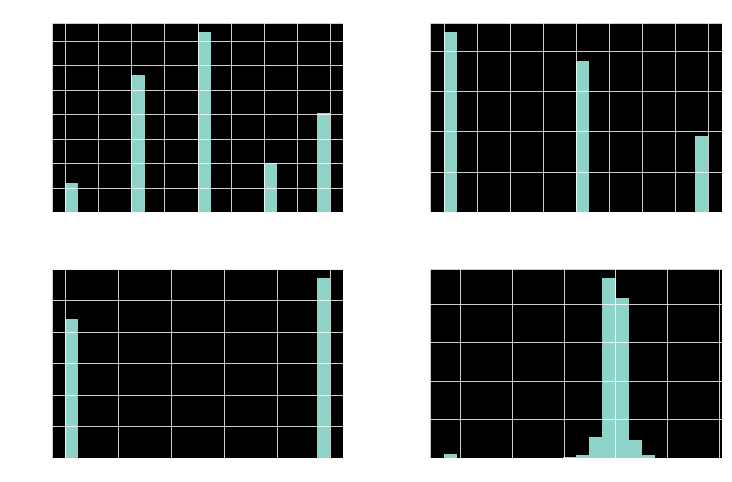

In [ ]:
train.hist(figsize=(12,8), bins=20);

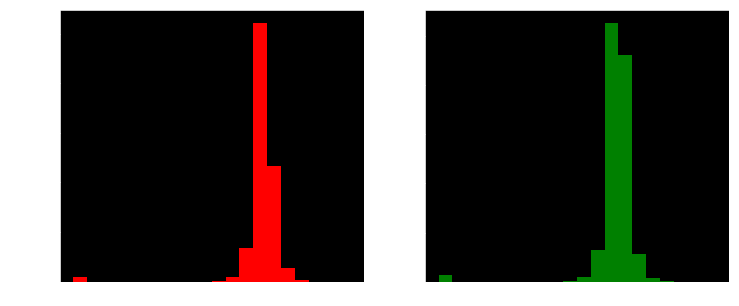

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(12,5))
train[train.feature_3==0].target.plot.hist(ax=axs[0], color='red', bins=20)
train[train.feature_3==1].target.plot.hist(ax=axs[1], color='green', bins=20)

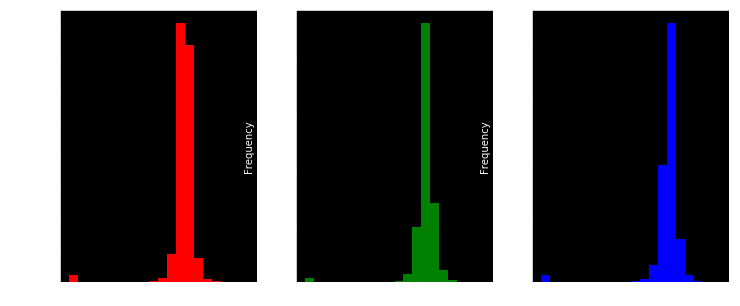

In [ ]:
fig,axs = plt.subplots(1,3, figsize=(12,5))
train[train.feature_2==1].target.plot.hist(ax=axs[0], color='red', bins=20)
train[train.feature_2==2].target.plot.hist(ax=axs[1], color='green', bins=20)
train[train.feature_2==3].target.plot.hist(ax=axs[2], color='blue', bins=20)

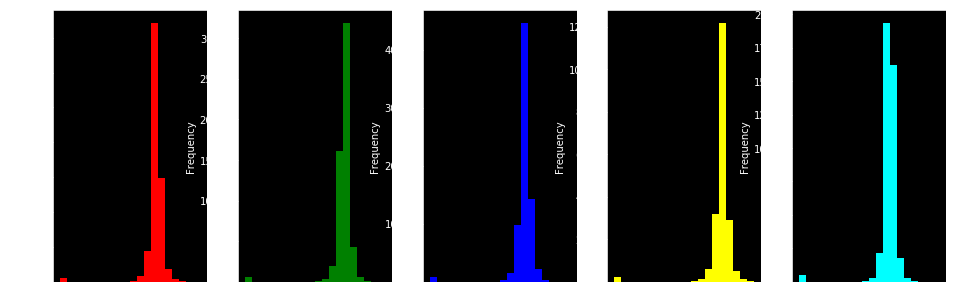

In [ ]:
fig,axs = plt.subplots(1,5, figsize=(16,5))
train[train.feature_1==1].target.plot.hist(ax=axs[0], color='red', bins=20)
train[train.feature_1==2].target.plot.hist(ax=axs[1], color='green', bins=20)
train[train.feature_1==3].target.plot.hist(ax=axs[2], color='blue', bins=20)
train[train.feature_1==4].target.plot.hist(ax=axs[3], color='yellow', bins=20)
train[train.feature_1==5].target.plot.hist(ax=axs[4], color='cyan', bins=20)

`feature_1`, `feature_2`, and `feature_3` have similar distribution

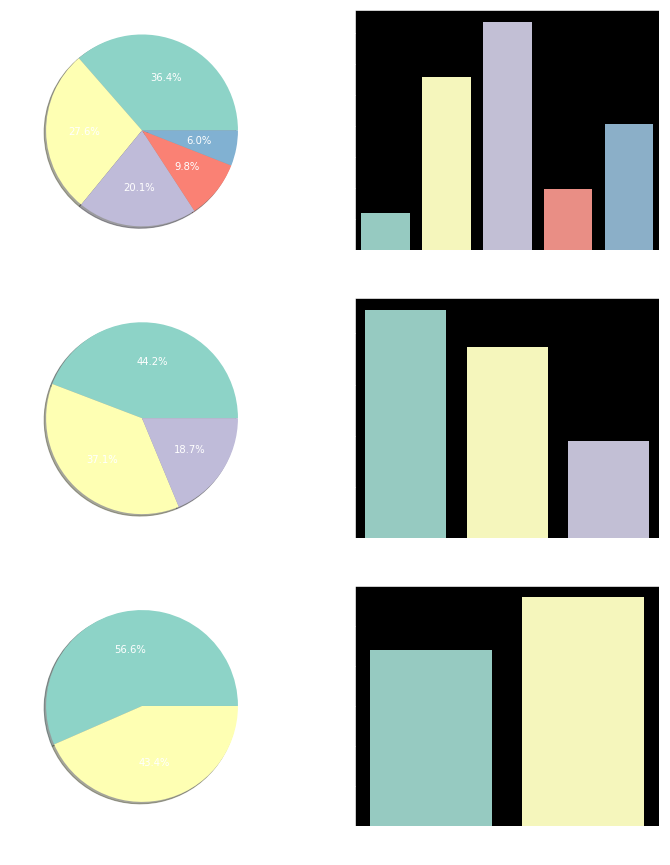

In [ ]:
import seaborn as sns
fig,axs = plt.subplots(3,2,figsize=(12,15))
for feat,ax in zip(['feature_1', 'feature_2', 'feature_3'], axs):
    train[feat].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
    sns.countplot(feat, data=train, ax=ax[1])

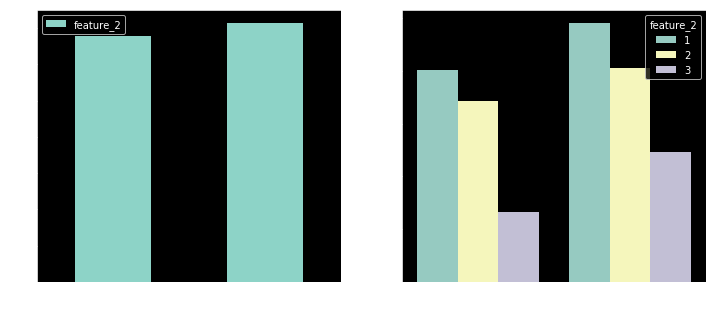

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
train[['feature_3', 'feature_2']].groupby(['feature_3']).mean().plot.bar(ax=axs[0])
sns.countplot(data=train, x='feature_3', hue='feature_2', ax=axs[1])

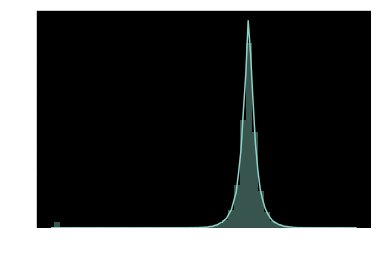

In [ ]:
sns.distplot(train.target);

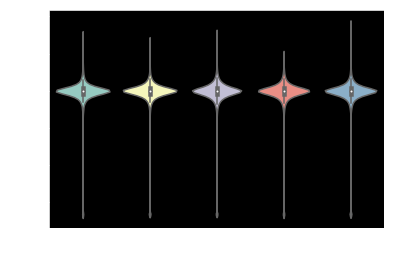

In [ ]:
sns.violinplot(data=train, x='feature_1', y='target', figsize=(20,12));